<a href="https://colab.research.google.com/github/colombiacoin/bogcoin/blob/master/AnalisisPredictivodelPreciodelaVivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Predictivo del Precio de la Vivienda

Presentado por : Jaime Luna Salguero

--------------------------------------------------------------------------------------------------

#Objetivo
Se pretende realizar una modelo predictivo basado en la regresión para calcula el precio de una vivienda función de las distintas variables del dataset, eligiendo el modelo que mejor se adapte según las métricas analizadas.

-------------------------------------------------------------------------------------------------

Fase 1. Importación del Data Set

Para este proyecto, utilizaremos un dataset público extraido Kaggle. https://www.kaggle.com/shree1992/housedata

In [1]:
#importamos fichero local. Importamos el archivo "House Price Prediction" de kaggle.com con información de precios de vivienda. Renombramos el archivo "data.csv" por "data_precios_vivienda.csv"
from google.colab import files
#Cargamos el archivo "data_precios_vivienda.csv" que está en un fichero local
uploaded = files.upload()

Saving Data_Precio_Vivienda.csv to Data_Precio_Vivienda.csv


In [3]:
#Importación de datos. Se importa la biblioteca de Python llamada pandas y la renombramos como pd. pandas es una biblioteca para el manejo y análisis de datos.
#Pandas proporciona estructuras de datos y funciones para trabajar con datos estructurados.
import pandas as pd
#Importación del módulo io de Python. io es un módulo que proporciona las capacidades de Python para manejar flujos (streams) de entrada/salida (I/O)
#Permite leer y escribir datos en diferentes formatos
import io
#Creación de la variable con el dataset
data_precios_vivienda = pd.read_csv(io.BytesIO(uploaded['Data_Precio_Vivienda.csv']))

Fase 2. Analisis Exploratorio de Datos

In [4]:
#Importación de Numpy. Esta  es una biblioteca que proporciona una gran cantidad de funcionalidades para manejar arrays de datos y matrices numéricas de gran tamaño.
#Numpy tambien maneja funciones de algebra lineal y matemáticas de alto nivel para operar con estos arrays.
import numpy as np

In [5]:
# nombre de las columnas
data_precios_vivienda.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
# exploracion del dataset
data_precios_vivienda

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [7]:
# consultamos el numero de filas y columnas
data_precios_vivienda.shape

(4600, 18)

In [8]:
# exploracion de las primeras líneas dataset
data_precios_vivienda.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
# consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
data_precios_vivienda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [10]:
# consultar tipo variables
data_precios_vivienda.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [11]:
#Importación de matplotlib
#Matplotlib es una biblioteca de Python utilizada para la generación de gráficos 2D y 3D, como histogramas, espectros de potencia, gráficos de barras, gráficos de error, diagramas de dispersión, etc.
import matplotlib.pyplot as plp
#importacion de seaborn
#Seaborn es una biblioteca de visualización de datos en Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos
import seaborn as sns

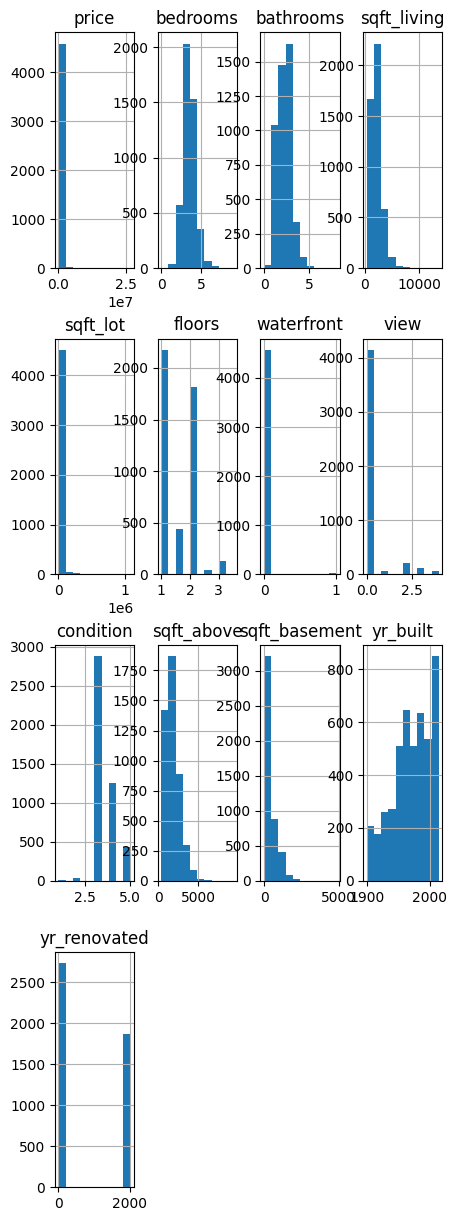

In [12]:
# visualizacion histogramas
data_precios_vivienda.hist(figsize=(5,15))
plp.show()

In [13]:
# volvemos a visualizar los nombres de las columnas para preparar el siguiente paso
data_precios_vivienda.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

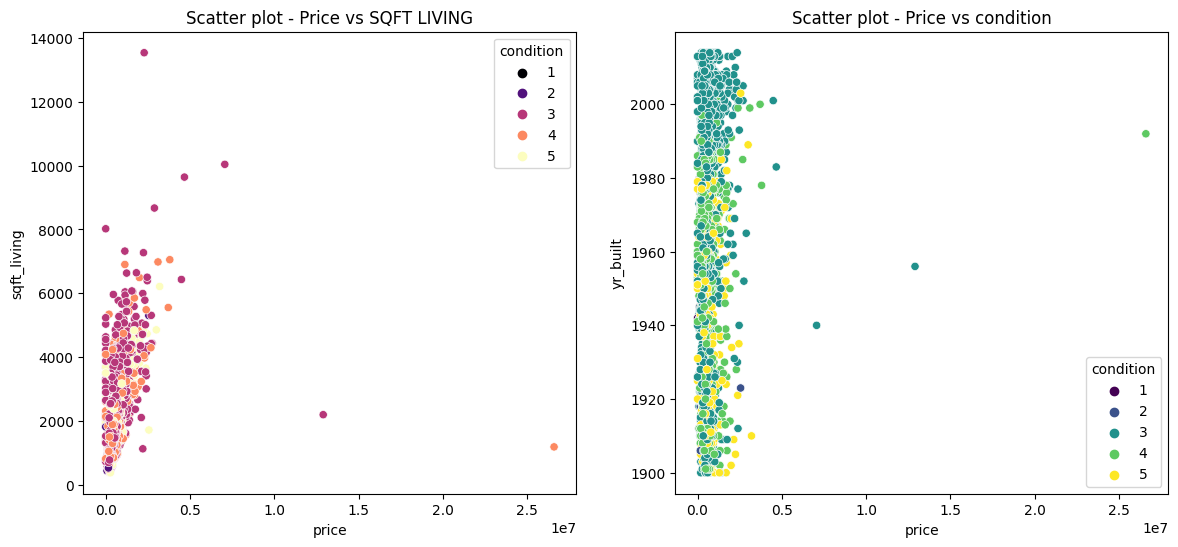

In [14]:
# visualizacion distribución variable price vs sqft living y vs condition

f = plp.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='price', y='sqft_living', data=data_precios_vivienda, palette='magma', hue='condition', ax=ax)
ax.set_title('Scatter plot - Price vs SQFT LIVING')
ax = f.add_subplot(122)
sns.scatterplot(x='price', y='yr_built', data=data_precios_vivienda, palette='viridis', hue='condition')
ax.set_title('Scatter plot - Price vs condition')
plp.savefig('sc.png')

<ipython-input-15-f3935af04d22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_precios_vivienda.corr()


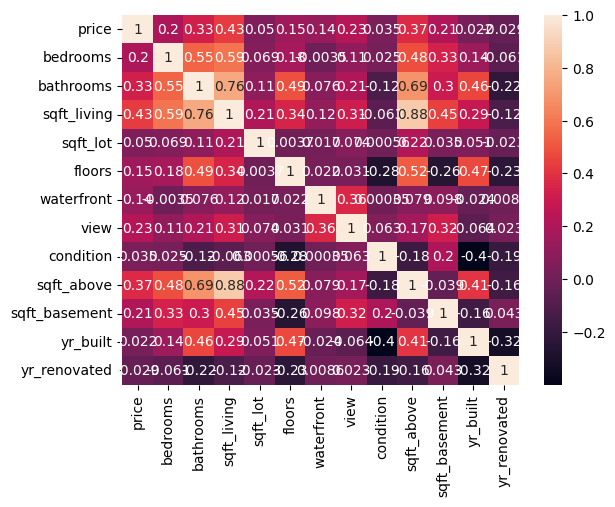

In [15]:
# estudio correlacion de variables
corr = data_precios_vivienda.corr()
sns.heatmap(corr, annot= True);

In [16]:
# consultamos si tenemos celdas sin valor
data_precios_vivienda.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

F3. Entrenamiento

Durante el ejercicio, vamos a realizar distintos modelos aplicando distintos tratamientos de datos para ver como éstos afectan al resultado sobre las métricas.


-------------------------------------------------------------------------------------------------

Dado que los modelos sólo aceptan variables numéricas, vamos a eliminar todas aquellas variables que no lo son como:

#date              object
#street            object
#city              object
#statezip          object
#country           object

In [18]:
#Borramos las variables categoricas
categorical_columns = ['date','street', 'city','statezip','country']
precios_hipot1= data_precios_vivienda.drop(categorical_columns,axis =1)

--------------------------------------------------------------------------------------------------------

"HIPOTESIS 1: Predicción del precio con el área construida.

In [171]:
#Definimos las variables dependientes e independientes
X_hipot1 = precios_hipot1.drop('sqft_living',axis=1) #  variables independientes
y_hipot1 = precios_hipot1['price'] #  variable depediente

In [172]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [173]:
# Entrenamiento - Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

F4. Evaluación y Analisis de Resultados

In [174]:
# VALIDACION DE LA HIPOTESIS 1

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot1_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot1_test))

Error Cuadrático Medio (MSE) TRAIN= 6.751389418249679e-20
Error Cuadrático Medio (MSE) TEST= 2.463230584467213e-20


#Hipotesis 2: Predicción del precio con la antiguedad del inmueble

In [84]:
#Borramos las variables categoricas
categorical_columns = ['date','street', 'city','statezip','country']
precios_hipot2= data_precios_vivienda.drop(categorical_columns,axis =1)

In [175]:
#Definimos las variables dependientes e independientes
X_hipot2 = precios_hipot2.drop('yr_built',axis=1) #  variables independientes
y_hipot2 = precios_hipot2['price'] #  variable depediente

In [176]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [177]:
# Entrenamiento - Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

In [179]:
#VALIDACION DE LA HIPOTESIS 2

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot2_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot2_test))

Error Cuadrático Medio (MSE) TRAIN= 6.902600113724285e-20
Error Cuadrático Medio (MSE) TEST= 2.996928459801637e-20


#Hipotesis 3: Predicción del precio con el estado del inmueble

In [138]:
#Borramos las variables categoricas
categorical_columns = ['date','street', 'city','statezip','country']
precios_hipot3= data_precios_vivienda.drop(categorical_columns,axis =1)

In [180]:
#Definimos las variables dependientes e independientes
X_hipot3 = precios_hipot3.drop('condition',axis=1) #  variables independientes
y_hipot3 = precios_hipot3['price'] #  variable depediente

In [181]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [182]:
# Entrenamiento - Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)

LinearRegression()

In [183]:
# VALIDACION DE LA HIPOTESIS 3

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_train = mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot3_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot3_test))

Error Cuadrático Medio (MSE) TRAIN= 2.774270996529858e-20
Error Cuadrático Medio (MSE) TEST= 1.1009654024321871e-20


HIPOTESIS 4: Transformamos las variables categóricas en variables numéricas.

Para ello, utilizaremos una técnica llamada one_hot_enconding que permite transformar en un conjunto de 1 y 0 una variable categórica. Por ejemplo, si tuviéramos una variable denominada color, con los valores Azul, Rojo y Verde, el one_hote_encoding crearía 3 variables color_Azul, color_Rojo, color_Verde con los valores 1 y 0 dependiendo de si el valor de la variable original era azul, rojo o verde

precios_hipot1= data_precios_vivienda
city, statezip, country

In [97]:
#Borramos las variables categoricas
categorical_columns = ['date','street', 'city','statezip','country']
precios_hipot4= data_precios_vivienda.drop(categorical_columns,axis =1)

In [98]:
# consultar tipo variables
data_precios_vivienda.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [108]:
#Borramos las variables categoricas
categorical_columns3 = ['date','street','city','statezip','country']
precios_hipot4= data_precios_vivienda.drop(categorical_columns3,axis =1)

In [109]:
# nombre de las columnas
precios_hipot4.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [129]:
# preparamos el dataset de la hipótesis 4
# vamos a tratar algunas de las variables categoricas con la técnica de one_hot_encoding
categorical_columns_4 = ['date','city','street','statezip', 'country']

In [130]:
#Preparamos el dataset de la hipótesis 4
precios_hipot4 = pd.get_dummies(data = data_precios_vivienda, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_4,
               drop_first =True,
              dtype='int8')

In [131]:
# nombre de las columnas
precios_hipot4.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'OHE_WA 98155', 'OHE_WA 98166', 'OHE_WA 98168', 'OHE_WA 98177',
       'OHE_WA 98178', 'OHE_WA 98188', 'OHE_WA 98198', 'OHE_WA 98199',
       'OHE_WA 98288', 'OHE_WA 98354'],
      dtype='object', length=4725)

In [132]:
# chequeamos nuestro dataSet
precios_hipot4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,OHE_WA 98155,OHE_WA 98166,OHE_WA 98168,OHE_WA 98177,OHE_WA 98178,OHE_WA 98188,OHE_WA 98198,OHE_WA 98199,OHE_WA 98288,OHE_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [184]:
X_hipot4 = precios_hipot4.drop('sqft_living',axis=1) #  variables independientes
y_hipot4 = precios_hipot4['price'] #  variable depediente

# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

In [185]:
print(X_hipot4_train.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement',
       ...
       'OHE_WA 98155', 'OHE_WA 98166', 'OHE_WA 98168', 'OHE_WA 98177',
       'OHE_WA 98178', 'OHE_WA 98188', 'OHE_WA 98198', 'OHE_WA 98199',
       'OHE_WA 98288', 'OHE_WA 98354'],
      dtype='object', length=4724)


In [186]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot4_train, y_hipot4_train)

LinearRegression()

In [187]:
# VALIDACION DE LA HIPOTESIS 4

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_train = mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot4_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot4_test))

Error Cuadrático Medio (MSE) TRAIN= 2.00434785428021e-18
Error Cuadrático Medio (MSE) TEST= 3.893367181066226e-18


Hipotesis 5

In [163]:
# preparamos el dataset de la hipótesis 4
# vamos a tratar algunas de las variables categoricas con la técnica de one_hot_encoding
categorical_columns_5 = ['date','city','street','statezip', 'country']

In [164]:
#Borramos las variables categoricas
categorical_columns5 = ['date','street', 'city','statezip','country']
precios_hipot5= data_precios_vivienda.drop(categorical_columns,axis =1)

In [165]:
precios_hipot5 = pd.get_dummies(data = data_precios_vivienda, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_5,
               drop_first =True,
              dtype='int8')

In [166]:
# Scaling Data
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
precios_hipot5[["price","sqft_living"]] = scaler.fit_transform(precios_hipot5[["price","sqft_living"]] )

In [167]:
X_hipot5 = precios_hipot5.drop('sqft_living',axis=1) #  variables independientes
y_hipot5 = precios_hipot5['price'] #  variable depnediente

In [168]:
# preparamos train data y test data
X_hipot5_train, X_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(X_hipot5, y_hipot5, test_size=0.20, random_state=43)
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot5_train, y_hipot5_train)

LinearRegression()

In [170]:
 #VALIDACION DE LA HIPOTESIS 5

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_train = mean_squared_error(y_true = y_hipot5_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot5_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot5_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_test = mean_squared_error(y_true = y_hipot5_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot5_test))

Error Cuadrático Medio (MSE) TRAIN= 1.1605845724971901e-19
Error Cuadrático Medio (MSE) TEST= 3.54661264460334e-05
